"""
Created on Mon Oct 2021

@author: Alex Nascimento Rodrigues
"""

In [27]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import tensorflow as tf
from keras.models import *
from keras.layers import *
from heapq import nlargest 
from keras.callbacks import *
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
reviews_df = pd.ExcelFile('drive/MyDrive/TCC-Alex-Rodrigues/Reviews-Dataset.xlsx').parse()

In [49]:
reviews_df_dict = reviews_df

results = {}

for review in reviews_df_dict['Processed_Review']:
  for word in review.split():
    if word not in results.keys():
      results[word] = 1
    else:
      results[word] = results[word] + 1

print(results)

{'bom': 8338, 'excelente': 4543, 'chegou': 4714, 'antes': 3142, 'previsto': 410, 'parabens': 637, 'produto': 7201, 'otimo': 4517, 'problemas': 857, 'instalacao': 224, 'vem': 1407, 'bateria': 586, 'boa': 3859, 'diferente': 1151, 'marcas': 171, 'inferiores': 23, 'achei': 3268, 'materia': 78, 'plastico': 601, 'baixa': 224, 'qualidade': 5573, 'preco': 1689, 'justo': 134, 'coisas': 1663, 'balancam': 1, 'dentro': 1476, 'vezes': 2050, 'sai': 287, 'lugar': 596, 'funcionou': 237, 'bem': 14308, 'maioria': 448, 'apertar': 83, 'botao': 264, 'controle': 682, 'algumas': 2126, 'funcionar': 239, 'configurei': 11, 'dois': 1676, 'botoes': 100, 'portao': 42, 'agora': 1500, 'abre': 198, 'fecha': 45, 'd': 137, 'entregue': 377, 'igual': 349, 'fotos': 407, 'acordo': 275, 'especificacoes': 41, 'descritas': 59, 'recomendo': 5738, 'motor': 22, 'ppa': 2, 'custobeneficio': 219, 'atendeu': 486, 'expectativa': 347, 'expectativas': 893, 'fiz': 470, 'compra': 1506, 'desse': 1386, 'retirei': 21, 'correios': 114, 'onte

In [50]:
res = nlargest(6, results, key = results.get) 

new_dict = {}

for i in res:
  new_dict[i] = results[i]

print(new_dict)

{'livro': 35950, 'bem': 14308, 'leitura': 8855, 'historia': 8687, 'bom': 8338, 'produto': 7201}


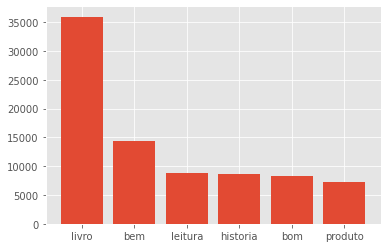

<Figure size 864x432 with 0 Axes>

In [113]:
plt.bar(new_dict.keys(), new_dict.values())
plt.figure(figsize=(12, 6))
plt.show()

{5: 40907, 4: 6740, 2: 1885, 1: 3446, 3: 3816}


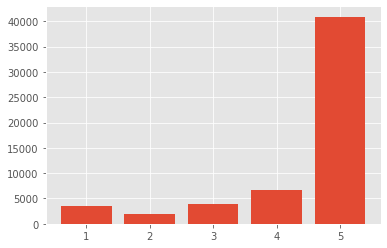

<Figure size 864x432 with 0 Axes>

In [111]:
reviews_df_stars = reviews_df

results_stars = {}

for stars in reviews_df_stars['Stars']:
  if stars not in results_stars:
    results_stars[stars] = 1
  else:
    results_stars[stars] = results_stars[stars] + 1

print(results_stars)

plt.bar(results_stars.keys(), results_stars.values())
plt.figure(figsize=(12, 6))
plt.show()

In [52]:

new_df = reviews_df


Train_X, Test_X, Train_Y, Test_Y = train_test_split(new_df['Processed_Review'],
                                                    new_df['Final_Result'],
                                                    test_size = 0.20, random_state = 36)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(reviews_df['Processed_Review'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [53]:
######################## 
########## SVC #########
########################

Encoder = LabelEncoder()
Train_Y_SVC = Encoder.fit_transform(Train_Y)
Test_Y_SVC = Encoder.fit_transform(Test_Y)

SVC = svm.SVC()
SVC.fit(Train_X_Tfidf, Train_Y_SVC)
predictions_SVC = SVC.predict(Test_X_Tfidf)
cmSvc = confusion_matrix(Test_Y_SVC, predictions_SVC)

print("\n--- Classification Report SVC ---\n", classification_report(Test_Y_SVC, predictions_SVC))
print("\n--- Confusion Matrix SVC ---\n", cmSvc)
print("\nSVC Accuracy Score -> ",accuracy_score(predictions_SVC, Test_Y_SVC)*100)



--- Classification Report SVC ---
               precision    recall  f1-score   support

           0       0.81      0.69      0.75      1871
           1       0.75      0.35      0.47      1744
           2       0.85      0.98      0.91      7744

    accuracy                           0.84     11359
   macro avg       0.80      0.67      0.71     11359
weighted avg       0.83      0.84      0.82     11359


--- Confusion Matrix SVC ---
 [[1298  145  428]
 [ 232  603  909]
 [  71   60 7613]]

SVC Accuracy Score ->  83.75737300818734


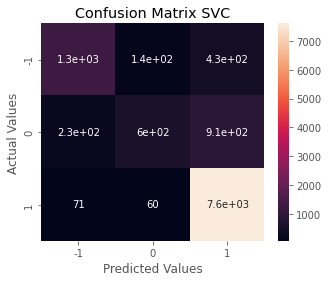

In [73]:
cm_df = pd.DataFrame(cmSvc,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix SVC')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
########################
###### Linear SVC ######
########################

lsvc = LinearSVC(verbose=1)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(Train_X_Tfidf, Train_Y)
predictions_LSVC = lsvc.predict(Test_X_Tfidf)
cmLsvc = confusion_matrix(Test_Y, predictions_LSVC)

print("\n--- Classification Report Linear SVC ---\n", classification_report(Test_Y, predictions_LSVC))
print("\n--- Confusion Matrix Linear SVC ---\n", cmLsvc)
print("\nLinear SVC Accuracy Score -> ",accuracy_score(predictions_LSVC, Test_Y)*100)


[LibLinear]
--- Classification Report Linear SVC ---
               precision    recall  f1-score   support

    Negative       0.77      0.79      0.78      1871
     Neutral       0.72      0.43      0.54      1744
    Positive       0.90      0.97      0.93      7744

    accuracy                           0.86     11359
   macro avg       0.79      0.73      0.75     11359
weighted avg       0.85      0.86      0.85     11359


--- Confusion Matrix Linear SVC ---
 [[1481  173  217]
 [ 349  752  643]
 [  95  123 7526]]

Linear SVC Accuracy Score ->  85.91425301523022


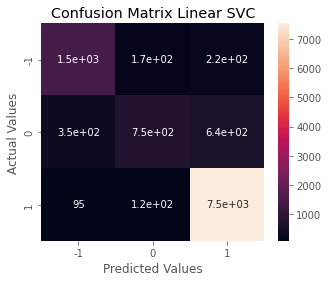

In [74]:
cm_dfLSVC = pd.DataFrame(cmLsvc,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfLSVC, annot=True)
plt.title('Confusion Matrix Linear SVC')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [57]:
########################
###### Naive Bayes #####
########################

MultinominalNB = naive_bayes.MultinomialNB()
MultinominalNB.fit(Train_X_Tfidf,Train_Y)
predictions_NB = MultinominalNB.predict(Test_X_Tfidf)
cmMultinominalNB = confusion_matrix(Test_Y, predictions_NB)

print("\n--- Classification Report MultinominalNB ---\n", classification_report(Test_Y, predictions_NB))
print("\n--- Confusion Matrix MultinominalNB ---\n", cmMultinominalNB)
print("\nMultinominalNB Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)




--- Classification Report MultinominalNB ---
               precision    recall  f1-score   support

    Negative       0.76      0.29      0.42      1871
     Neutral       0.62      0.02      0.04      1744
    Positive       0.72      0.99      0.83      7744

    accuracy                           0.72     11359
   macro avg       0.70      0.43      0.43     11359
weighted avg       0.71      0.72      0.64     11359


--- Confusion Matrix MultinominalNB ---
 [[ 537   15 1319]
 [  66   35 1643]
 [ 108    6 7630]]

MultinominalNB Accuracy Score ->  72.2070604806761


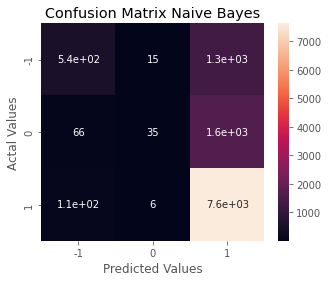

In [71]:
cm_dfNB = pd.DataFrame(cmMultinominalNB,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfNB, annot=True)
plt.title('Confusion Matrix Naive Bayes')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [59]:
########################
########## SGDC ########
########################

SGDClassifierModel = SGDClassifier()
SGDClassifierModel.fit(Train_X_Tfidf, Train_Y)
predictions_SGDC = SGDClassifierModel.predict(Test_X_Tfidf)
cmMultinominalSGDC = confusion_matrix(Test_Y, predictions_SGDC)

print("\n--- Classification Report SGDClassifier ---\n", classification_report(Test_Y, predictions_SGDC))
print("\n--- Confusion Matrix SGDClassifier ---\n", cmMultinominalSGDC)
print("\nSGDClassifier Accuracy Score -> ",accuracy_score(predictions_SGDC, Test_Y)*100)


--- Classification Report SGDClassifier ---
               precision    recall  f1-score   support

    Negative       0.79      0.69      0.74      1871
     Neutral       0.94      0.11      0.20      1744
    Positive       0.81      0.99      0.89      7744

    accuracy                           0.81     11359
   macro avg       0.84      0.60      0.61     11359
weighted avg       0.82      0.81      0.76     11359


--- Confusion Matrix SGDClassifier ---
 [[1289   12  570]
 [ 266  199 1279]
 [  76    1 7667]]

SGDClassifier Accuracy Score ->  80.59688352847962


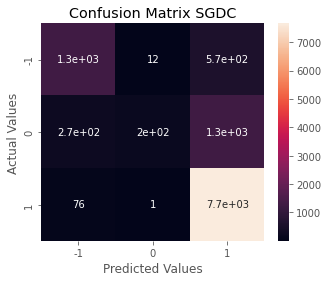

In [75]:
cm_dfSGDC = pd.DataFrame(cmMultinominalSGDC,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfSGDC, annot=True)
plt.title('Confusion Matrix SGDC')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [61]:
# The maximum number of words to be used. 
VOCAB_SIZE = 10000
# Default.
BATCH_SIZE = 32
# EPOCHS
EPOCHS = 15
# UNITS
UNITS = 64

tokenizer = Tokenizer(num_words=VOCAB_SIZE, lower=True,split=' ')
tokenizer.fit_on_texts(new_df['Processed_Review'].values)
X = tokenizer.texts_to_sequences(new_df['Processed_Review'].values)
X = pad_sequences(X)
Y = pd.get_dummies(new_df['Final_Result']).values

Train_X_RNN, Test_X_RNN, Train_Y_RNN, Test_Y_RNN = train_test_split(X,Y, test_size = 0.20, random_state = 36)

In [62]:
###################################
########## LSTM ###################
###################################

LSTM_model = Sequential()
LSTM_model.add(Embedding(VOCAB_SIZE, 128))
LSTM_model.add(Bidirectional(tf.keras.layers.LSTM(units=UNITS, dropout=0.2)))
#LSTM_model.add(LSTM(dropout=0.2, units=UNITS))
LSTM_model.add(Dense(3,activation='softmax'))
LSTM_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history_LSTM = LSTM_model.fit(Train_X_RNN, Train_Y_RNN, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_split=0.2, callbacks=EarlyStopping(monitor='val_accuracy', mode='max', patience=5))

print("Using Test values: \n")
score, acc = LSTM_model.evaluate(Test_X_RNN,Test_Y_RNN, verbose=1, batch_size=BATCH_SIZE )
print("Score: %2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

Epoch 1/15
1136/1136 [==============================] - 122s 100ms/step - loss: 0.5073 - accuracy: 0.7980 - val_loss: 0.3718 - val_accuracy: 0.8525
Epoch 2/15
1136/1136 [==============================] - 114s 100ms/step - loss: 0.2818 - accuracy: 0.8917 - val_loss: 0.3358 - val_accuracy: 0.8749
Epoch 3/15
1136/1136 [==============================] - 112s 98ms/step - loss: 0.1941 - accuracy: 0.9274 - val_loss: 0.3516 - val_accuracy: 0.8804
Epoch 4/15
1136/1136 [==============================] - 112s 99ms/step - loss: 0.1384 - accuracy: 0.9507 - val_loss: 0.3733 - val_accuracy: 0.8695
Epoch 5/15
1136/1136 [==============================] - 111s 98ms/step - loss: 0.0981 - accuracy: 0.9656 - val_loss: 0.4330 - val_accuracy: 0.8727
Epoch 6/15
1136/1136 [==============================] - 111s 98ms/step - loss: 0.0733 - accuracy: 0.9754 - val_loss: 0.4323 - val_accuracy: 0.8817
Epoch 7/15
1136/1136 [==============================] - 111s 98ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss:

In [103]:

cmLSTM = confusion_matrix(Test_Y_RNN.argmax(axis=1), Test_X_RNN.argmax(axis=1))


cm_dfLSTM = pd.DataFrame(cmLSTM)

print(cm_dfLSTM)



     0    1    2    3    4    5    6    7    8    9    ...  156  157  158  \
0      1    0    0    1    0    1    0    1    1    0  ...   62   67   79   
1     19    0    0    0    0    0    0    0    0    0  ...   51   39   66   
2      2    0    0    0    1    1    1    0    0    1  ...  222  281  286   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
161    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
162    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
163    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
164    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
165    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     159  160  161  162  163  164   165  
0     72  109  115  131  139  124

(0.0, 0.5965913195163012)

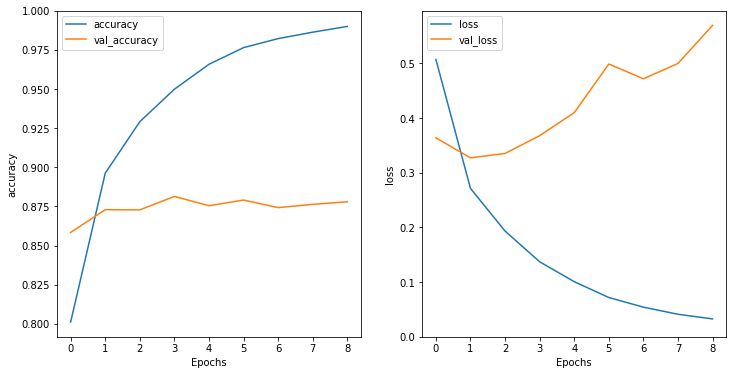

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_LSTM, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_LSTM, 'loss')
plt.ylim(0, None)

In [76]:
###################################
########## GRU ####################
###################################

GRU_model = Sequential()
GRU_model.add(Embedding(VOCAB_SIZE, 128))
#GRU_model.add(GRU(units=UNITS, dropout=0.2))
GRU_model.add(Bidirectional(GRU(dropout=0.2,units=UNITS)))
GRU_model.add(Dense(3,activation='softmax'))
GRU_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history_GRU = GRU_model.fit(Train_X_RNN, Train_Y_RNN, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_split=0.2, callbacks=EarlyStopping(monitor='val_accuracy', mode='max', patience=5))

print("Using Test values: \n")
score, acc = GRU_model.evaluate(Test_X_RNN,Test_Y_RNN, verbose=1, batch_size=BATCH_SIZE )
print("Score: %2f" % (score))
print("Validation Accuracy: %.2f" % (acc))


Epoch 1/15
1136/1136 [==============================] - 108s 93ms/step - loss: 0.4932 - accuracy: 0.8048 - val_loss: 0.3448 - val_accuracy: 0.8661
Epoch 2/15
1136/1136 [==============================] - 104s 91ms/step - loss: 0.2618 - accuracy: 0.8998 - val_loss: 0.3205 - val_accuracy: 0.8742
Epoch 3/15
1136/1136 [==============================] - 104s 91ms/step - loss: 0.1805 - accuracy: 0.9325 - val_loss: 0.3358 - val_accuracy: 0.8725
Epoch 4/15
1136/1136 [==============================] - 104s 92ms/step - loss: 0.1265 - accuracy: 0.9540 - val_loss: 0.3670 - val_accuracy: 0.8776
Epoch 5/15
1136/1136 [==============================] - 104s 91ms/step - loss: 0.0950 - accuracy: 0.9664 - val_loss: 0.4291 - val_accuracy: 0.8745
Epoch 6/15
1136/1136 [==============================] - 104s 92ms/step - loss: 0.0692 - accuracy: 0.9754 - val_loss: 0.4474 - val_accuracy: 0.8771
Epoch 7/15
1136/1136 [==============================] - 104s 92ms/step - loss: 0.0477 - accuracy: 0.9834 - val_loss: 0

In [104]:
cmGRU = confusion_matrix(Test_Y_RNN.argmax(axis=1), Test_X_RNN.argmax(axis=1))


cm_dfGRU = pd.DataFrame(cmGRU)

print(cm_dfGRU)


     0    1    2    3    4    5    6    7    8    9    ...  156  157  158  \
0      1    0    0    1    0    1    0    1    1    0  ...   62   67   79   
1     19    0    0    0    0    0    0    0    0    0  ...   51   39   66   
2      2    0    0    0    1    1    1    0    0    1  ...  222  281  286   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
161    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
162    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
163    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
164    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
165    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     159  160  161  162  163  164   165  
0     72  109  115  131  139  124

(0.0, 0.6396959991194308)

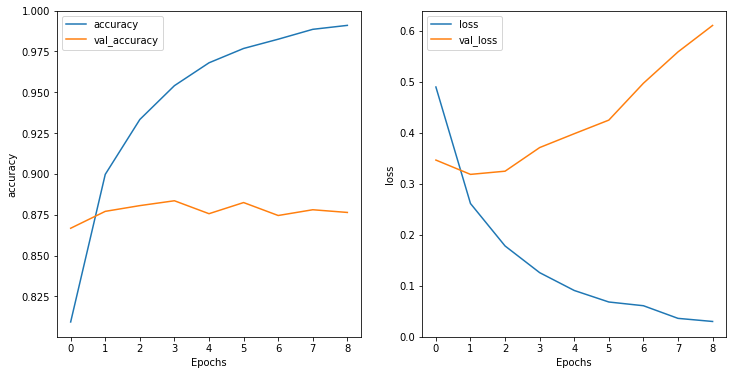

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_GRU, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_GRU, 'loss')
plt.ylim(0, None)